##**CNNpred**: *CNN-based stock market prediction using a diverse set of variables Data Set*

Team:

**Jaryd Domine**

**Sharon Yang**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Processed_NYSE.csv")

---
###§1. Business Understanding

#### Overview of dataset


>* Obtained from UCI
* *Type*: Stock market
* *Dataset name*: **CNNpred: CNN-based stock market prediction using a diverse set of variables Data Set**
* *Dataset link*: https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables
* *Instances*: 1985
* *Attributes*: 84
* *Citation*: Hoseinzade, E., & Haratizadeh, S. (2019). CNNpred: CNN-based stock market prediction using a diverse set of variables. Expert Systems with Applications, 129, 273-285.

> *Abstract*: This dataset contains several daily features of S&P 500, NASDAQ Composite, Dow Jones Industrial Average, RUSSELL 2000, and NYSE Composite from 2010 to 2017.


This dataset includes five major U.S. stock market indices, labelled as
* DJI
* NASDAQ
* NYSE
* RUSSELL
* S&P

We restrict our view to **NYSE**.

This data was aggregated by Ehsan Hoseinzade, a Ph.D. student of computer science at Simon Fraser University. Sources include **Yahoo Finance, TA-Lib, FRED (Federal Reserve Economic Data), and Investing.com**.

---

This is time-series data, with each row corresponding to a Date (M-F, no weekends). 

There are 84 features, listed as follows:



In [3]:
df.columns

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC',
       'SSEC', 'S&P', 'RUT', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')

These features can be divided into eight categories:


1.   *Primitive variables*: 'Date', 'Close' 
2.   *Technical indicators*: 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200'
3.   *World stock market indices*: 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC', 'SSEC', 'S&P', 'RUT'
4.   *Exchange rate of USD to other currencies*: 'GBP', 'JPY', 'CAD', 'CNY', 'AUD', 'CHF', 'EUR', 'NZD', 'Dollar index'
5.   *Commodities*: 'Oil', 'Gold', 'Brent', 'copper-F', 'WIT-oil', 'gold-F', 'GAS-F', 'silver-F', 'wheat-F', 'XAG', 'XAU'
6.   *Data from major US companies*: 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM'
7.   *Future contracts (-F)*: 'CAC-F', 'DAX-F', 'DJI-F', 'FTSE-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'Nikkei-F', 'RUSSELL-F', 'S&P-F', 'Dollar index-F'
8.   *Other variables (e.g. treasury bill rates)*: 'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'DAAA', 'DBAA', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2', 'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y'

*Ignored variable*:
* 'Name': Identifies the market index. We only use NYSE, so all entries are 'NYA'. 

---





####Purpose

This data was originally collected to create a model for predicting the **next day's price movement** for each of 5 market indices (DJI, NASDAQ, NYSE, RUSSELL, S&P 500).

*Link to paper*: https://www.sciencedirect.com/science/article/pii/S0957417419301915

We have a slightly different objective and will use different methods.

The ultimate goal is to make the largest return possible, and one makes money in the stock market by predicting the future.

---


####Prediction task

The specific prediction task we've chosen is:

>predict the (ordinal) price movement for the day given features from the previous day.
* The price change (df.mom) is binned into 5 categories, 'sharp fall', 'fall', 'neutral', 'rise', and 'sharp rise.' 

To be useful, the resulting strategy would need to produce better returns than buy-and-hold or technical indicator-based strategies. A scoring method is described in the above paper.

The level of accuracy required varies depending on the user's reliance on the model. If the user pairs the model with sound technical analysis and other data, the model needs only be accurate enough to provide a second opinion. The desirec percentage of accuracy will depend on the user's risk tolerance.

For an algorithmic trading system using this model exclusively, the model needs to be on the right side of the coin (fall vs. rise) more than 50% of the time.

---
###§2.  Data Understanding

#### Load dataset and define data types



>*A table of descriptions for all used variables is available at* https://www.sciencedirect.com/science/article/pii/S0957417419301915
(pp. 283-284, Table A.1.)



The attributes have been categorized in the Business Understanding section. We briefly describe each category here:

1.    *Primitive variables*:
        The Date for which the prediction is going to be made and Close price of the NYSE index. **The Dates skip over weekends; there are 5 rows per week.**
2.    *Technical indicators*: Extracted from historical data of stock prices and trading information
        * **VOL** - relative change of volume
        * **MOM-x** - return of *x+1* days before;
        * **ROC-x** - rate of change for past *x* days;
        * **EMA-x** - exponential moving average for past *x* days;
3.    *World stock market indices*: 
        Return of other global indices on the given Date
4.    *Exchange rate of USD to other currencies*: 
        Relative change in US Dollar to other currencies
5.    *Commodities*:
        Relative change in price of various goods and materials
6.    *Data from major US companies*: 
        Return on the given Date of major stocks, e.g. AAPL (Apple)
7.    *Future contracts (-F)*:
        Return on the given Date of certain Futures
8.    *Other variables*:
        Price of various treasury bills, bonds, and securities.

We load the data:

In [4]:
df = pd.read_csv("Processed_NYSE.csv")
df = df.drop(columns='Name')

As mentioned in §1, ***we eliminate the 'Name' attribute***, which identifies the index. We only use NYSE, so all entries of 'Name' are 'NYA'.

Let's check the data types:

In [5]:
unique,counts = np.unique(np.array(df.dtypes.array),return_counts=True)
for i,dtype in enumerate(unique):
    print(dtype,"|",counts[i],"instance(s)")

float64 | 82 instance(s)
object | 1 instance(s)


'Date' is given as a string (e.g. '2009-12-31')

All other attributes are **continuous variables with float type**. Most represent the return of a stock, commodity, or future over the previous day.

For example, the price of AAPL (Apple) stock rose 1.556% on the second day of the dataset:

In [6]:
df.AAPL[1]

0.0155649265


Some columns like 'Close' (previous closing price of NYSE index) and 'EMA' (exponential moving average) are given as *price* instead of *change* in price. These are the standard things most investors are used to seeing:

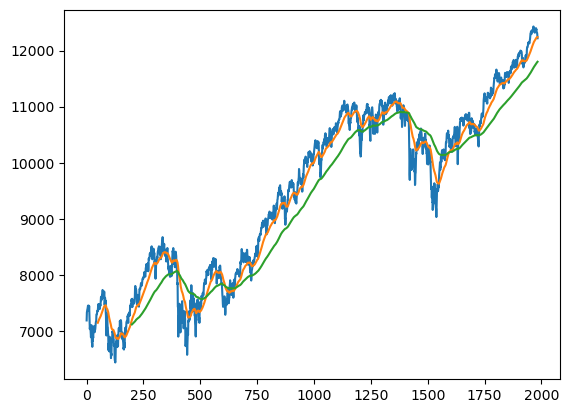

In [7]:
plt.plot(df.Close)
plt.plot(df.EMA_50)
plt.plot(df.EMA_200)

####Missing data

We now check for missing values with the **missingno** library.

Overview of all features:

<AxesSubplot: >

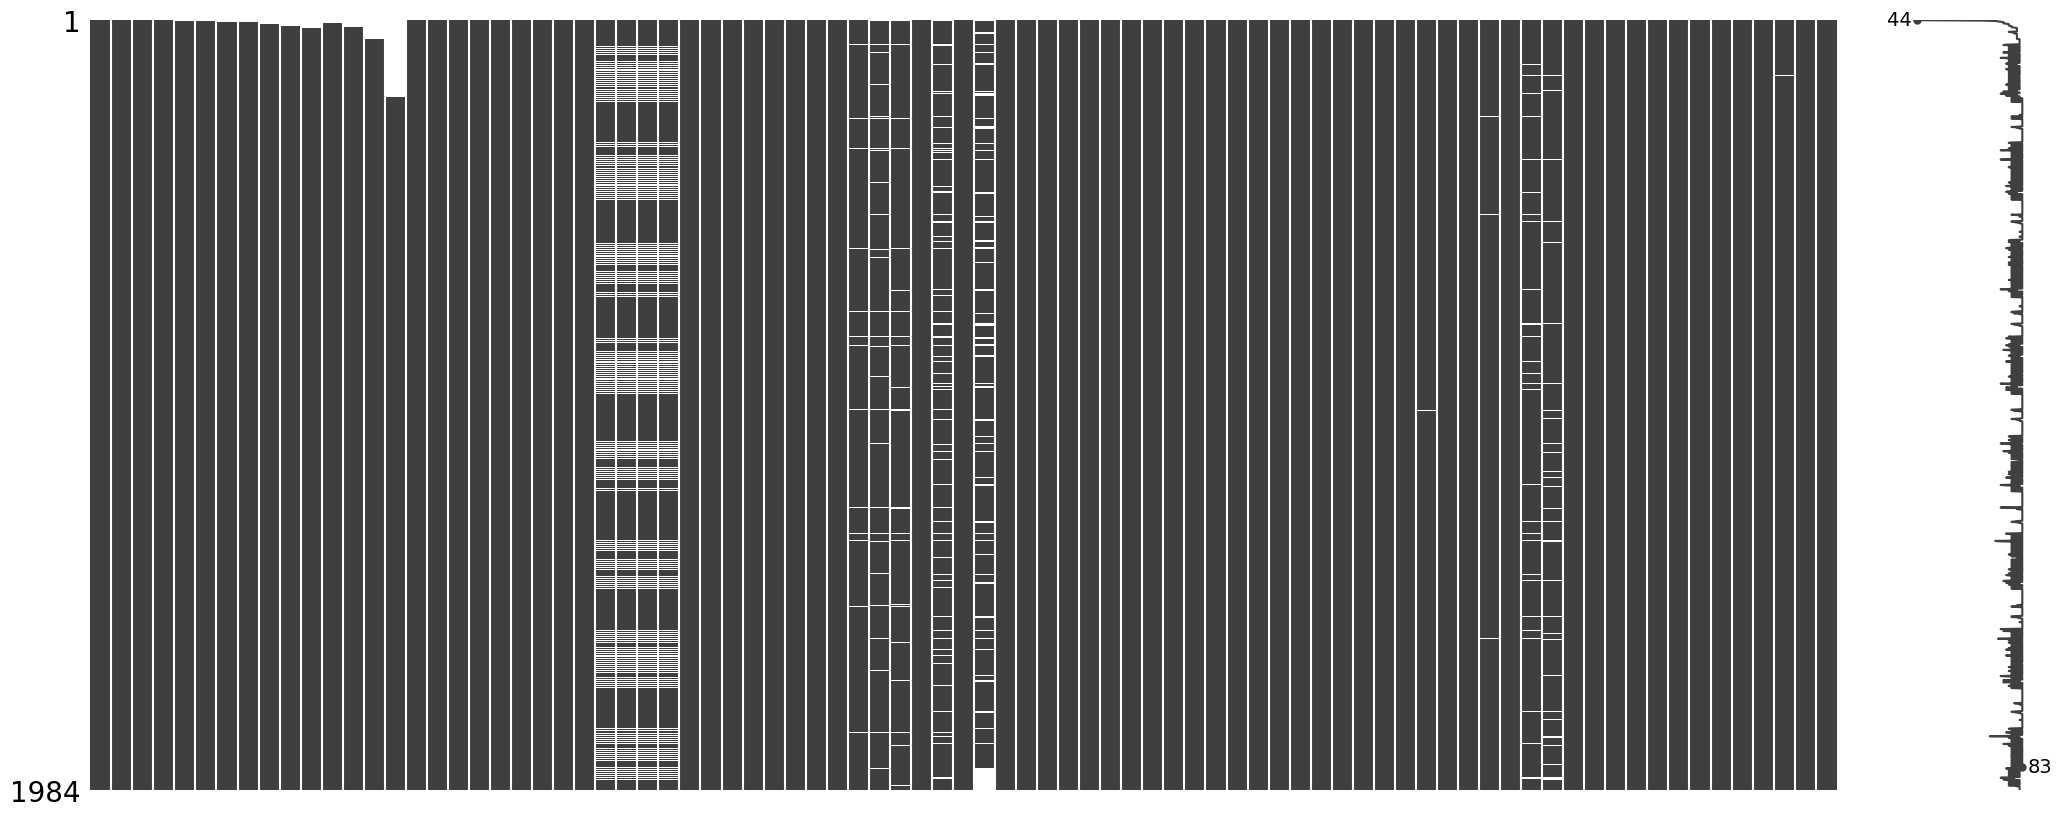

In [8]:
import missingno as msno
msno.matrix(df)

>We see several patterns here.
1. On the left side, entries are missing from early rows. This corresponds to technical indicators (TI) that require multiple days of data to calculate (e.g. EMA-200).
2. There is a strange banding pattern that spans 4 columns. These are the **exchange rates** for 'GBP', 'JPY', 'CAD', and 'CNY'. There are spans of ~140 days where this this data is only given for 2-3 days each week instead of all 5. This problem does not extend to 'EUR', 'NZD', 'CHF', or 'Dollar index'.
3. Ten other columns from the middle and right exhibit a more sporadic loss pattern.
4. As shown on the sparkchart to the right, the first row is missing a lot of data. Most columns show a change in dollar value from the previous day, and thus there is no data for day 0 (2009-12-31).

We address these issues in the next subsection.

####Imputation & Elimination

#####***Issues 1&4***:

[**Issue 1**] The various technical indicators (MOM, ROC, EMA) require up to 200 days of lead-time to be calculated.

[**Issue 4**] Return is calculated close-close; i.e. the relative *change* in value from the previous day's close to the current day's close. The first row (day) therefore has many missing entries.

We resolve both of these issues by **eliminating the first 200 rows** (days) from the dataset.

In [9]:
df = pd.read_csv("Processed_NYSE.csv").drop(columns='Name')
df = df[200:]
df.reset_index(drop=True,inplace=True)
df.head

<bound method NDFrame.head of             Date         Close    Volume       mom      mom1      mom2  \
0     2010-10-18   7571.100098 -0.222686  0.006715 -0.003444 -0.001972   
1     2010-10-19   7423.649902  0.258440 -0.019475  0.006715 -0.003444   
2     2010-10-20   7523.810059 -0.102184  0.013492 -0.019475  0.006715   
3     2010-10-21   7515.669922 -0.080036 -0.001082  0.013492 -0.019475   
4     2010-10-22   7522.910156 -0.312958  0.000963 -0.001082  0.013492   
...          ...           ...       ...       ...       ...       ...   
1779  2017-11-09  12339.660156 -0.017375 -0.003638  0.001089 -0.002393   
1780  2017-11-10  12322.599609 -0.089962 -0.001383 -0.003638  0.001089   
1781  2017-11-13  12316.820313 -0.024084 -0.000469 -0.001383 -0.003638   
1782  2017-11-14  12280.110352  0.070184 -0.002980 -0.000469 -0.001383   
1783  2017-11-15  12220.339844 -0.022755 -0.004867 -0.002980 -0.000469   

          mom3     ROC_5    ROC_10    ROC_15  ...   NZD  silver-F  RUSSELL-F  \
0

#####***Issues 2&3***:


[**Issue 2**] For several months at a time, the exchange rates 'GBP', 'JPY', 'CAD', 'CNY' only show 2-3 values per week instead of the usual 5. These appear as bands of partially missing **data**.

[**Issue 3**] Ten other columns have data missing sporadically.

Looking at **issue 2**, we isolate a span of 150 days containing one of these bands. We see that these exchange rates are very erratic:

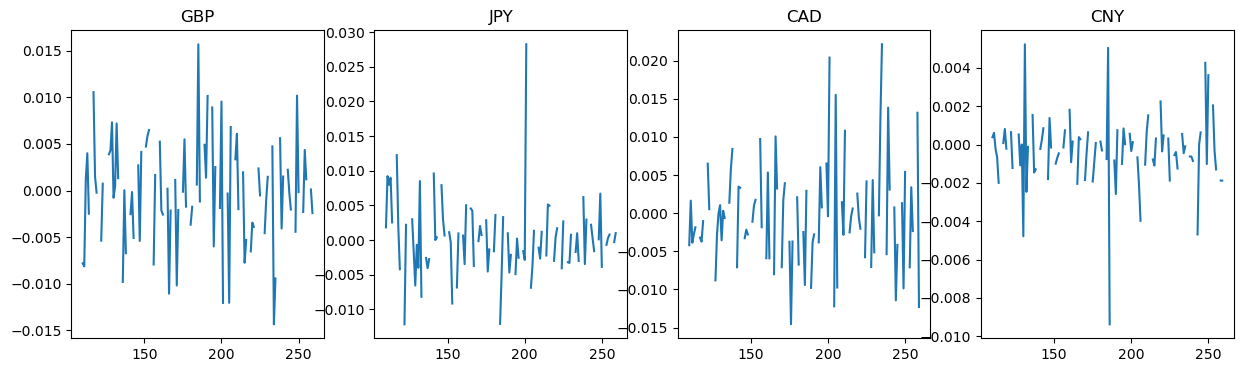

In [10]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
for i,currency in enumerate(['GBP','JPY','CAD','CNY']):
    ax[i].plot(df[currency][110:260])
    ax[i].set_title(currency)

The other exchange rates ('EUR', 'NZD', 'CHF', and 'Dollar index') have complete data. We try to determine a correlation:



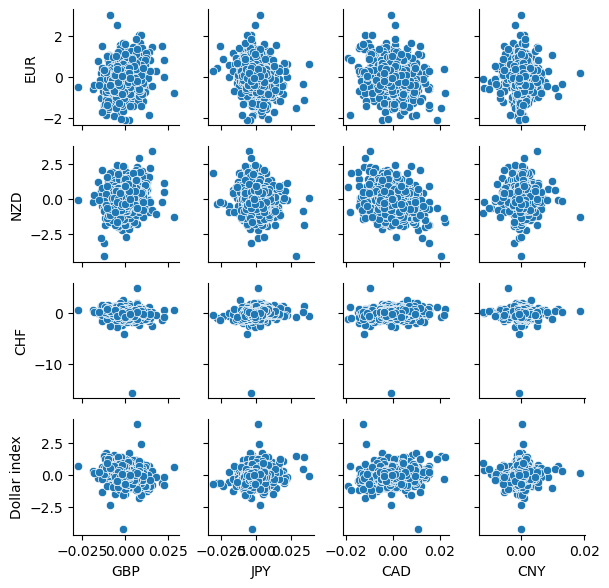

In [11]:
exch_pg = sns.PairGrid(df,height=1.5,x_vars=['GBP','JPY','CAD','CNY'],y_vars=['EUR', 'NZD', 'CHF','Dollar index'])
exch_pg.map(sns.scatterplot)

Unfortunately, there is no clear correlation we could use to input to missing data.

We can instead calculate an N-day rolling mean, treating NaN as zero. This is used to fill in the gaps (in GBP, for example):

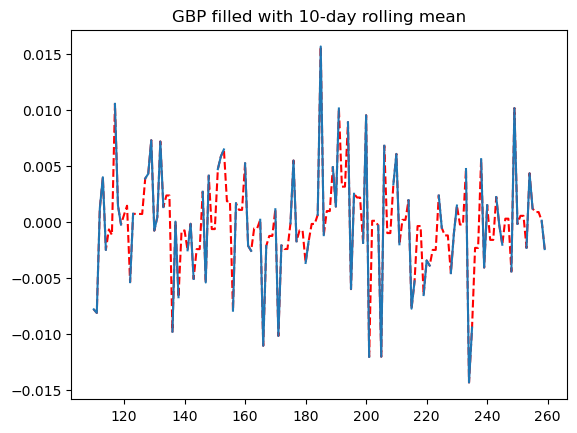

In [12]:
#calculate the N-day rolling mean
def fill_Nday_rolling(col,N):
    col = col.reset_index(drop=True)
    wherenull = np.where(col.isnull())[0]
    rollmean  = col.fillna(0).rolling(N).mean()
    for i in wherenull:
        col[i] = rollmean[i]
    return pd.DataFrame(col)

plt.plot(fill_Nday_rolling(df.GBP,10)[110:260],linestyle='dashed',color='red')
plt.plot(df.GBP[110:260])
plt.title('GBP filled with 10-day rolling mean');

>* The disconnected blue line is the base data
* The dashed red line uses the 10-day rolling mean to fill in the gaps.

**We apply this method to the 4 exchange rates and 10 other columns with missing data.**


####Target categories

For the prediction task, let's add a column that categorizes the day's return ('mom'):


In [13]:
pd.qcut(df.mom,q=5)

0           (0.00638, 0.0525]
1         (-0.0715, -0.00509]
2           (0.00638, 0.0525]
3       (-0.00509, -0.000991]
4        (-0.000991, 0.00208]
                ...          
1779    (-0.00509, -0.000991]
1780    (-0.00509, -0.000991]
1781     (-0.000991, 0.00208]
1782    (-0.00509, -0.000991]
1783    (-0.00509, -0.000991]
Name: mom, Length: 1784, dtype: category
Categories (5, interval[float64, right]): [(-0.0715, -0.00509] < (-0.00509, -0.000991] < (-0.000991, 0.00208] < (0.00208, 0.00638] < (0.00638, 0.0525]]

For now, we let pandas bin the values into 5 quantiles automatically. We can give more descriptive labels to these intervals:

In [14]:
pd.qcut(df.mom,q=5,labels=['sharp fall','fall','neutral','rise','sharp rise'])

0       sharp rise
1       sharp fall
2       sharp rise
3             fall
4          neutral
           ...    
1779          fall
1780          fall
1781       neutral
1782          fall
1783          fall
Name: mom, Length: 1784, dtype: category
Categories (5, object): ['sharp fall' < 'fall' < 'neutral' < 'rise' < 'sharp rise']

####Cleanup summary

* Elimination is used on the first 200 rows because the technical indicator data is missing in large, contiguous chunks.

* Imputation is used for missing data in the other columns. There are only 1-2 contiguous NaNs at a time, so a rolling mean is feasible.

<AxesSubplot: >

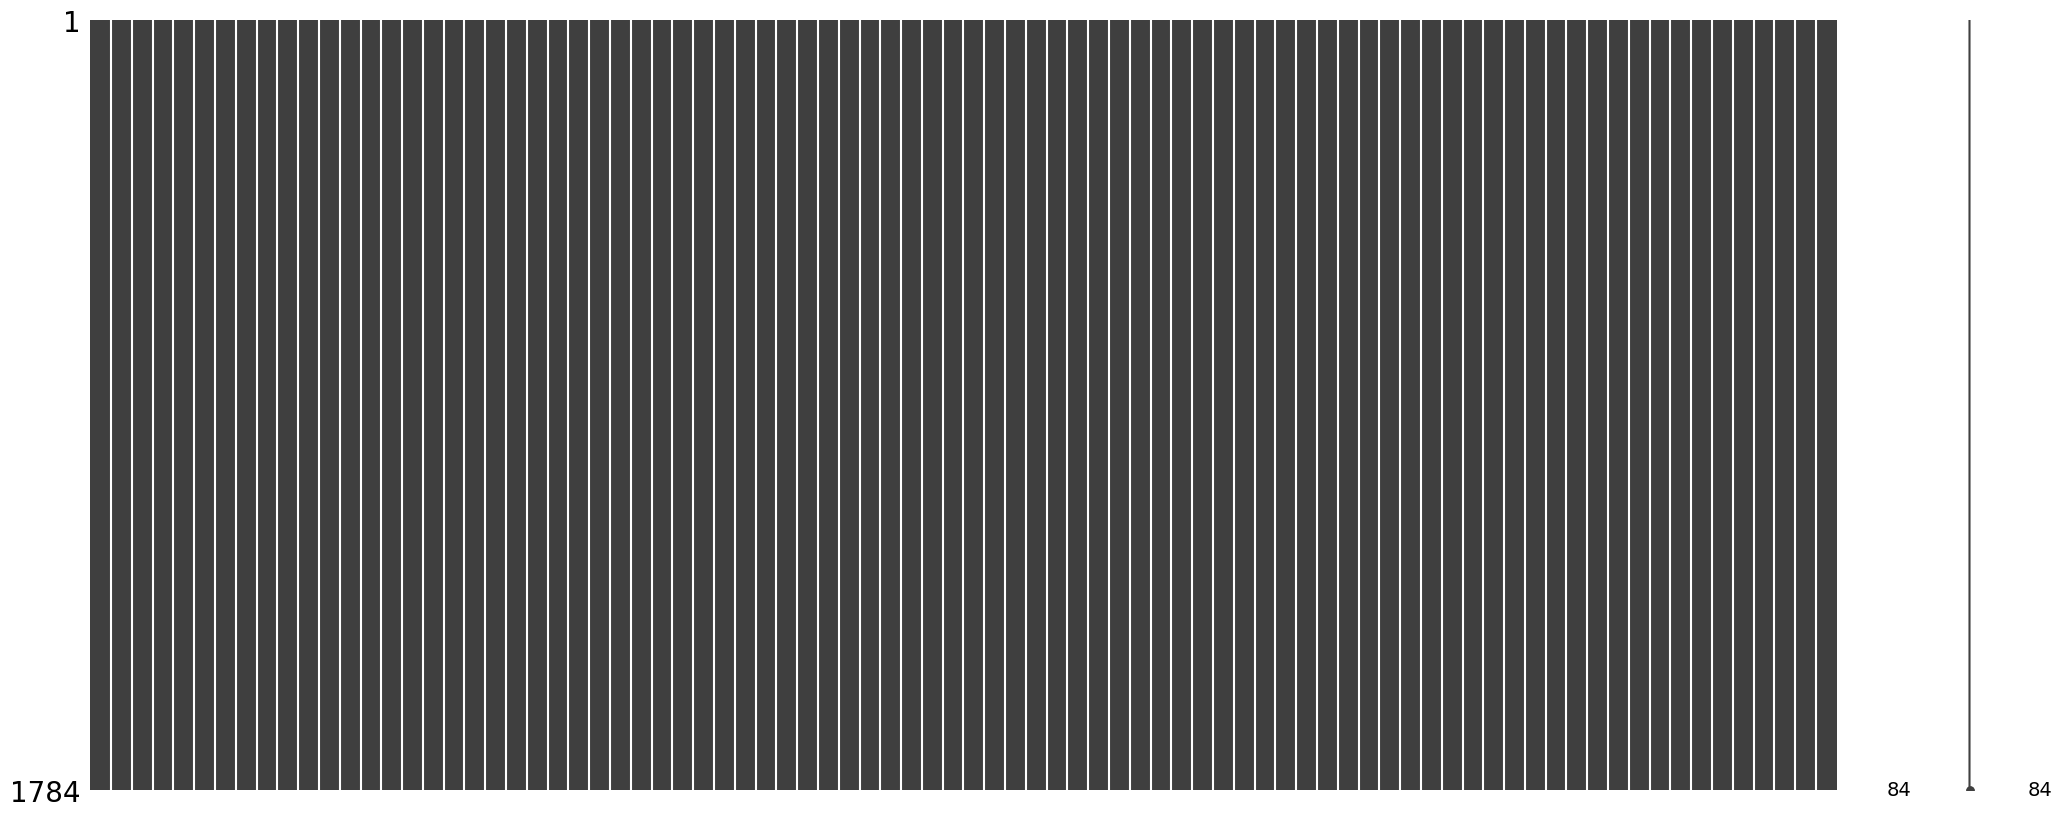

In [15]:
#Load csv and drop Name column
df = pd.read_csv("Processed_NYSE.csv").drop(columns='Name')

#Impute missing data with a 10-day rolling mean
incomplete_exch  = ['GBP','JPY','CAD','CNY']
incomplete_other = ['HSI-F', 'KOSPI-F', 'FTSE-F', 'DAX-F', 'CAC-F', 'SSEC', 'HSI', 'FCHI', 'FTSE', 'GDAXI']
for col in (incomplete_exch + incomplete_other):
    df[col] = fill_Nday_rolling(df[col],10)

#cut off the first 200 days
df = df[200:]

#add the target (ordinal) feature
df['price_movement'] = pd.qcut(df.mom,q=5,labels=['sharp fall','fall','neutral','rise','sharp rise'])

#check completeness
msno.matrix(df)

---
###§3.  Data Visualization

####Three questions

>The following visualizations will answer these three questions:
1. How does this data relate to the typical investor's experience with stock trading? How does it relate to common technical analysis?
2. How are the many quantities correlated? Do they exhibit the positive correlation associated with "green days" and "red days?"
3. What does PCA do to this data? Does it create clusters?

####Price action

We begin with the most familiar visualization, a plot of price (of the NYSE index) with two indicators (EMA_50 and EMA_200):

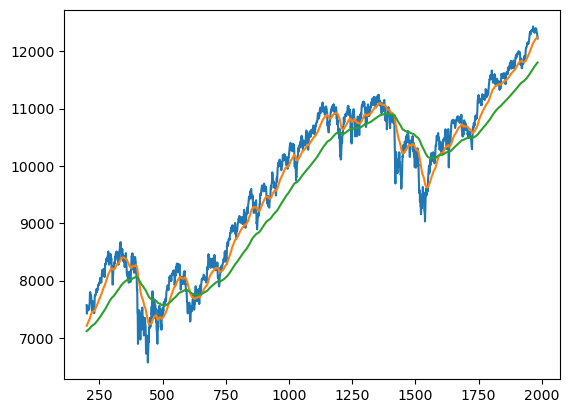

In [16]:
plt.plot(df.Close)
plt.plot(df.EMA_50)
plt.plot(df.EMA_200)

>The closing price from day to day is shown in blue.
The EMA_200 (green) looks at a longer timeframe and thus tracks the price action more slowly than EMA_50 (orange).

There are many patterns here that a stock trader might notice. From the left, we see a "rising wedge", that "breaks out" into an "upward channel," which bounces along the EMA_200. The price then "breaks" down through the EMA_200, which signals a fall back the "level of support" around $9000. The support holds, and the price rebounds.

Observing these patterns is part of "technical analysis."

Our model will be mostly unaware of such large-scale patterns, levels of support, etc. We would expect a trader to use technical analysis alongside the model's prediction in their strategy.

####Feature correlations

Markets tend to have "green days" and "red days." Stocks in the same exchange (e.g. NYSE) or same sector (e.g. tech) tend to move together. We thus expect to find positive correlation between the many stocks, commodities, and futures listed here.

<AxesSubplot: >

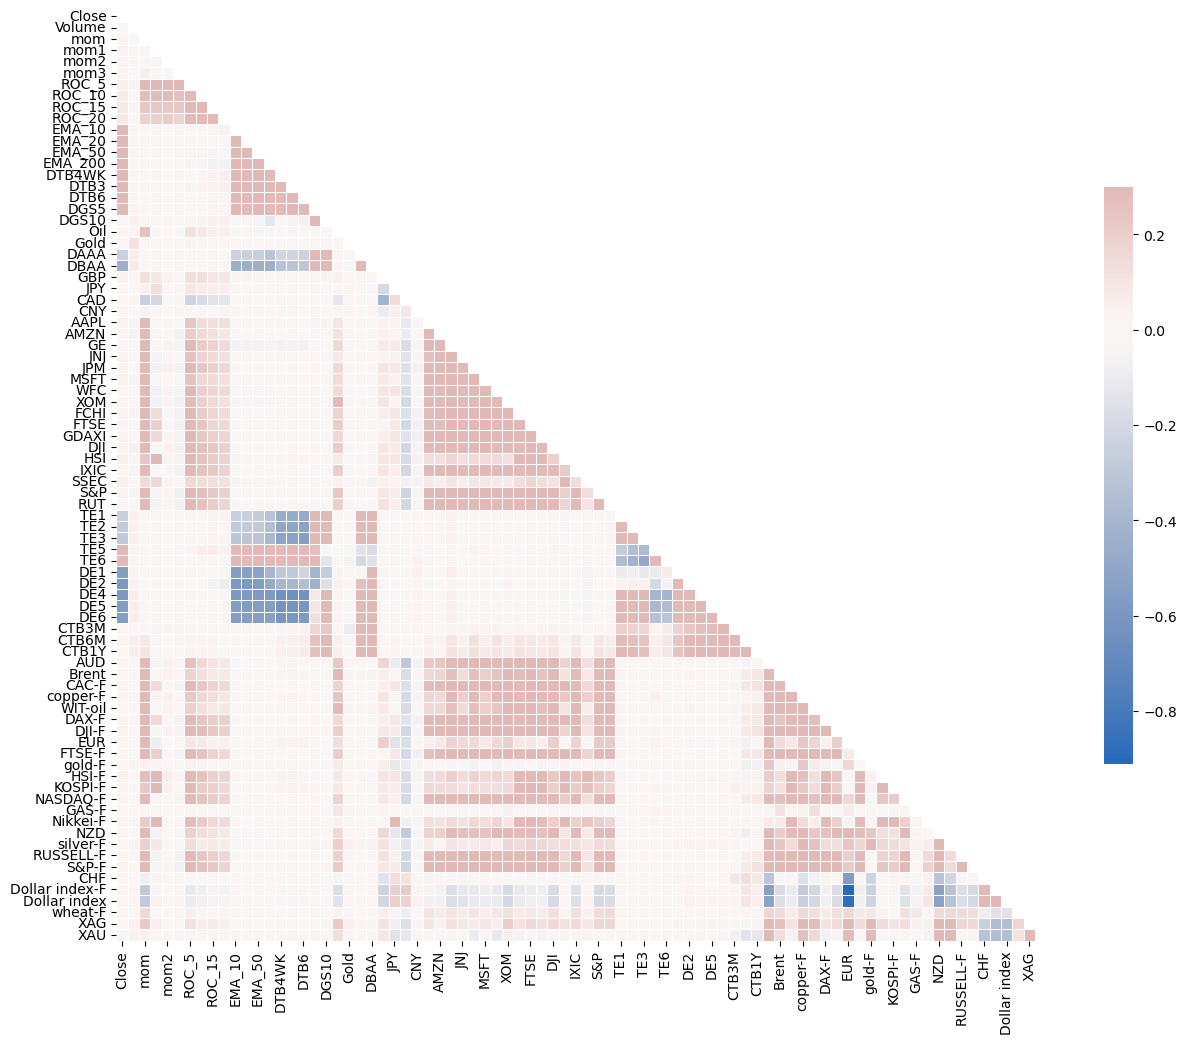

In [17]:
cor_mat = df.corr()
mask = np.triu(np.ones_like(cor_mat, dtype=bool)) #reduce redundancy
cmap = sns.color_palette("vlag", as_cmap=True) #use 'hot-cold' color map

fig,ax = plt.subplots(figsize=(15,15))

sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

>There are far too many things here to unpack at once, but here are some important points:
1. The large blocks of red show the expected positive correlation between the various stocks (e.g. AMZN), futures (e.g. DAX-F). This is the "green day, red day" effect we mentioned.
2. Commodities (e.g. gold, oil, copper) have a weak but positive correlation to stocks and futures.
3. Looking at the 'ROC-x' (rate of change) columns, we see a fading correlation as the timespan x increases. But intuitively, if the stock has been going up for the past 5 days, it will continue up. The positive correlation reflects the *momentum* of prices.
4. The 'TE' and 'DE' features relate to corporate bond values. They have a strongly **negative** correlation to the price of teasury bills (e.g. DBAA) and index price (Close, EMA, etc.).
5. Exchange rates have a naturally negative correlation with the value of the dollar. EUR has the strongest negative correlation of all currencies shown.



####PCA



> This section follows the tutorial at https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60



In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
xvar = ['Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5','ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200','DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA','DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM','MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC','SSEC', 'S&P', 'RUT', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2','DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'AUD', 'Brent', 'CAC-F','copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F','HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F','RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index','wheat-F', 'XAG', 'XAU']
yvar = 'price_movement'

x = df.loc[:, xvar].values
y = df.loc[:, yvar].values
x = StandardScaler().fit_transform(x)

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, df[yvar]], axis = 1)

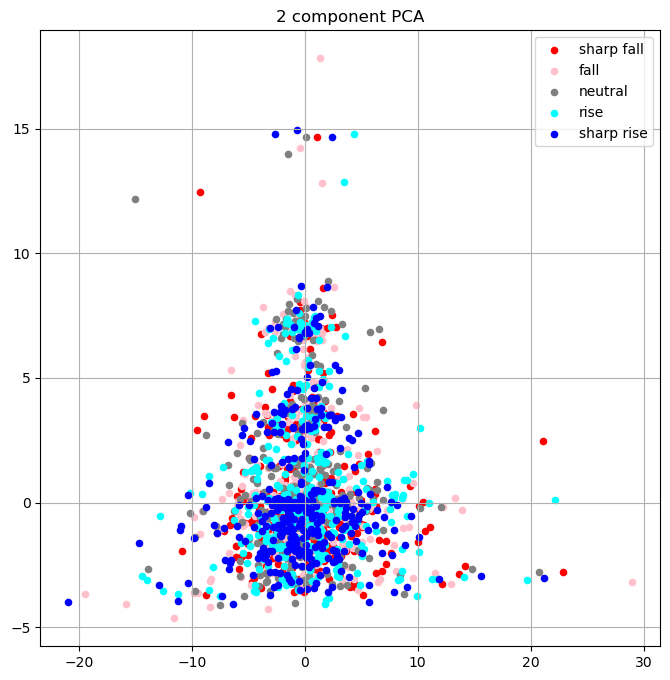

In [21]:
fig,ax = plt.subplots(figsize = (8,8))
ax.set_title('2 component PCA')
targets = ['sharp fall','fall','neutral','rise','sharp rise']
colors = ['red','pink','grey','cyan','blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[yvar] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

This PCA does not seem useful. No clear clusters are formed; perhaps UMAP will do a better job.

It is undetermined at this point why there is no clear clustering.

####Return violins

We briefly observe the violin plots for 3 columns.

<AxesSubplot: >

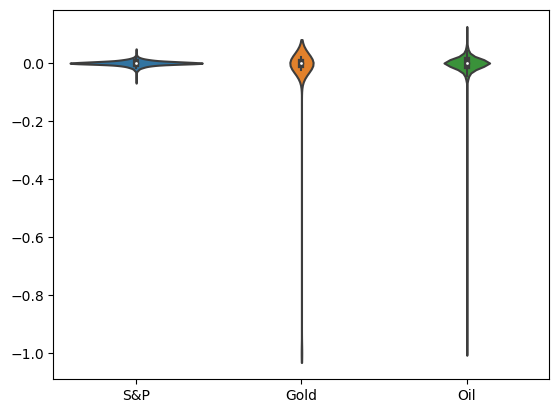

In [22]:
sns.violinplot(data=df.filter(['S&P','Gold','Oil']),cut=True)

Notice that returns seem to be normally distributed tightly around zero, with occasional outliers.

####Exchange rate correlations

*Refer to §2. Data Understanding, Issues 2&3*

---
###§4.  Exceptional Work: UMAP

>*Implement dimensionality reduction using UMAP, then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods.*

This section follows the UMAP-learn tutorial at https://umap-learn.readthedocs.io/en/latest/basic_usage.html



In [23]:
!pip install umap-learn
!pip install umap-learn[plot]
import umap
import umap.plot

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/e1/eb/dca6cfd872e8542fb57dd56ff2d5d67baed270aee6db739c6414d8d5b3b5/umap-learn-0.5.3.tar.gz
  ERROR: Could not find a version that satisfies the requirement numpy>=1.17 (from umap-learn) (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6)
ERROR: No mat

2023-01-03 10:30:49.333382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### UMAP explanation
To explain UMAP well, t-SNE needs to explained at the first place. T-SNE uses t-distribution to determine similarity between each two points in a dataset. By drawing a line of length of two points under a t-distribution curve, with one point centered on the point of interest, and projecting the other point on the curve, that projected point represents its similarity to the centered point. Repeating this process ends up to a matrix of similarity scores, and this matrix will be used to visualize high-dimensional dataset.

Both t-SNE and UMAP are dimensionality reduction methods with graph layout algorithms. Beyond t-SNE, UMAP inspired from algebraic topology and Riemannian geomotry constructs a weighted graph first, with edge strength representing similarity, and then projects this graph to a lower dimensionality.

References:
https://pair-code.github.io/understanding-umap/supplement.html

https://www.youtube.com/watch?v=NEaUSP4YerM


---
Following the above-mentioned tutorial, we partition the columns into input and target variables. We have left out the Date variable (we're not treating this as time-series) and consider only the continuous features.

We rescale the chosen input features and create a "mapper." This will simply take the values from a point in 82-dimensional space to a point in 2-dimensional space.

UMAP uses an objective function when creating this mapper. This function is simply stated:
> * If points are far away in high dim space, they should be far away in low dim space.
* If points are close in high dim space, they should be close in low dim space.

The resulting mapper is chosen because it does a good job at preserving both local and global distances.

This is contrasted with t-SNE, which cares mostly about the second bullet point (and loses global meaning).

In [ ]:
xvar = ['Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5','ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200','DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA','DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM','MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC','SSEC', 'S&P', 'RUT', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2','DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'AUD', 'Brent', 'CAC-F','copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F','HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F','RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index','wheat-F', 'XAG', 'XAU']
yvar = 'price_movement'

x = df.loc[:, xvar].values
y = df.loc[:, yvar].values
x = StandardScaler().fit_transform(x)

mapper = umap.UMAP().fit(x)

(1784, 2)

We now observe a few ways to visualize this mapping.

First, we acknowlege that binning the target variable may be unhelpful. If we leave it continuous and color the plot based on the day's return value, we get a visually pleasing transition from negative to positive return:

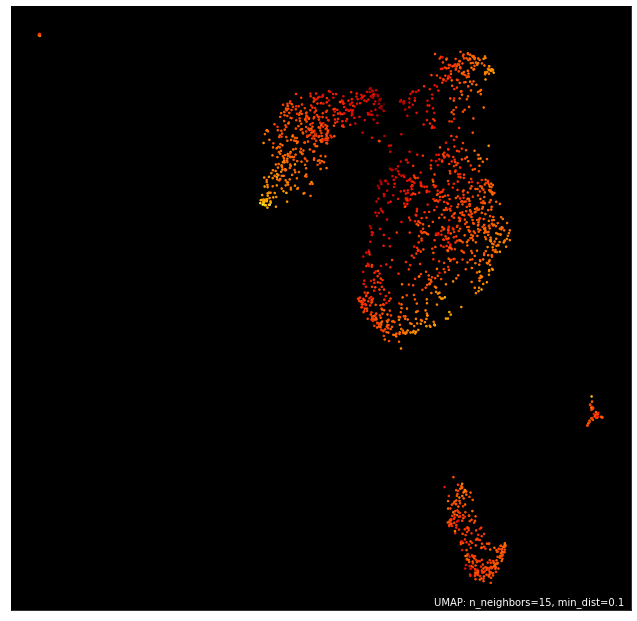

In [ ]:
umap.plot.points(mapper, values=df.mom, theme='fire')

This smooth transition is desirable. One can place a point (uncolored), and have immediate intuition as to whether the price will fall or rise on the given day.

A red-to-blue diverging color palette may better help illustrate this.

---

We can also use "edge bundling" to give a sense of connectivity to the plot. As we continuously vary the values in a row, we may expect points to transition to different regions of low-dim space following these lines.

Practically, it is desirable to know where a point lies on the path between a fall region and a rise region to determine the likelihood of either.

It would be interesting to know if, with a shorter data timestep (minute-to-minute rather than day-to-day), points migrate smoothly around this region along these channels.

/usr/local/lib/python3.7/dist-packages/umap/plot.py:855: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


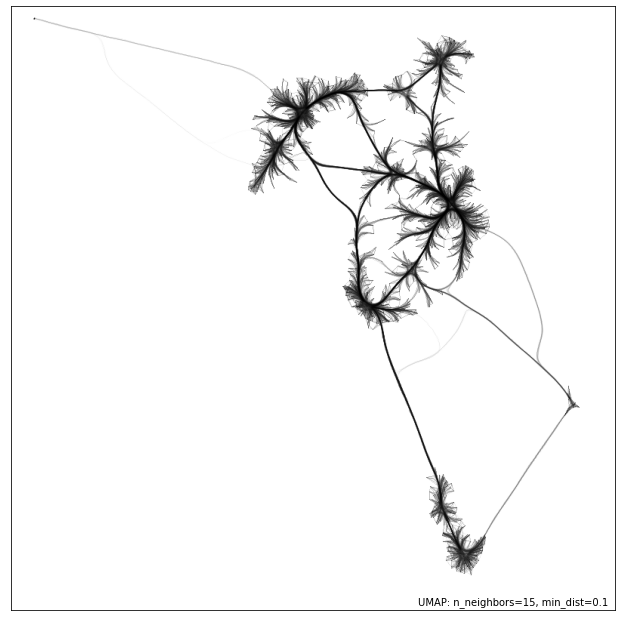

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

We would like to examine these outlier clusters on the upper left and lower right of the screen. Due to time constraints (14 minutes until due), we save this for future work.